In [57]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from IPython.display import display, Image
import operator

In [ ]:
class CurrencyState(TypedDict):
    EUR: float
    USD: float
    # INR: float
    INR:Annotated[float, operator.add] # because we are using INR in multiple nodes so we need to use Annotated to avoid InvalidUpdateError


In [66]:
def convert_inr_to_eur(state: CurrencyState) -> CurrencyState:
    state['EUR'] = state['INR'] / 90.0
    return state

In [67]:
def convert_inr_to_usd(state: CurrencyState) -> CurrencyState:
    state['USD'] = state['INR'] / 80.0
    return state

In [68]:
graph = StateGraph(CurrencyState)

In [69]:
graph.add_node("INR_to_EUR", convert_inr_to_eur)
graph.add_node("INR_to_USD", convert_inr_to_usd)


graph.add_edge(START, "INR_to_EUR")
graph.add_edge(START, "INR_to_USD")
graph.add_edge("INR_to_EUR", END)
graph.add_edge("INR_to_USD", END)

workflow =   graph.compile()

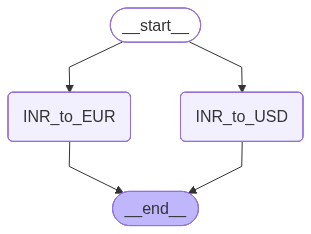

In [70]:
display(Image(workflow.get_graph().draw_mermaid_png()))

In [71]:
initial_state = {'INR': 7200.0}
result = workflow.invoke(initial_state)
print(result)

{'EUR': 80.0, 'USD': 90.0, 'INR': 21600.0}
